# Plotting and Visualization

绘图是数据分析工作中最重要的任务之一，是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idel等。

In [1]:
%pylab inline

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## A Brief matplotlib API Primer

使用matplotlib的办法有很多种，最常用的方式是pylab模式的ipython(ipython --pylab)。这样会将ipython配置为使用你所指定的matplotlib GUI后端（Tk, wxPython, PyQt, Mac OS X native, GTK）。

### Figures and Subplots

matplotlib 的图像都位于 Figure 对象中。

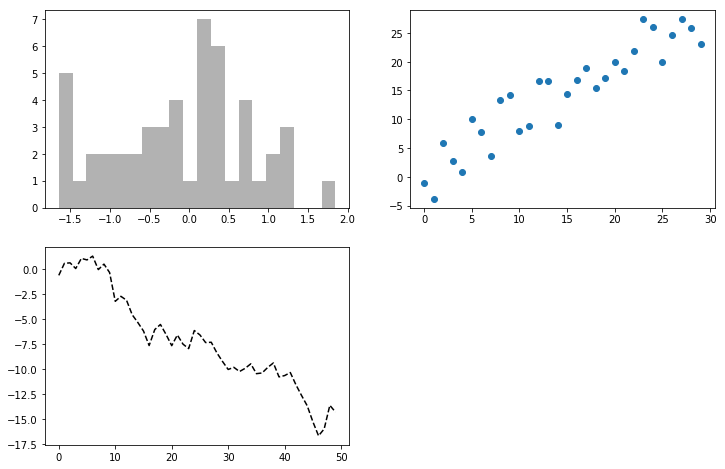

In [2]:
# 用 plt.figure 创建一个新的 Figure
# 用 figsize 选项设定图片保存的大小
fig = plt.figure(figsize=(12,8))

# 不能透过空 Figure 绘图，必须用 add_subplot 创建几个或多个 subplot
# 图像是 2x2，当前选中的是4个 subplot 中的第一个
ax1 = fig.add_subplot(2,2,1)

# 把后面两个subplot也创建出来
# 调用 fig.add_subplot() 返回 AxesSubplot 对象
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 调用 plt.plot() 会在最后一个 subplot 上进行绘制
# 'k--' 是一个线型选项，告诉 matplotlib 绘制黑色虚线
plt.plot(randn(50).cumsum(), 'k--')

# 直接调用 AxesSubplot 对象实例方法，可以在空的格子里绘画
ax1.hist(randn(50), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113e98390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114294850>]], dtype=object)

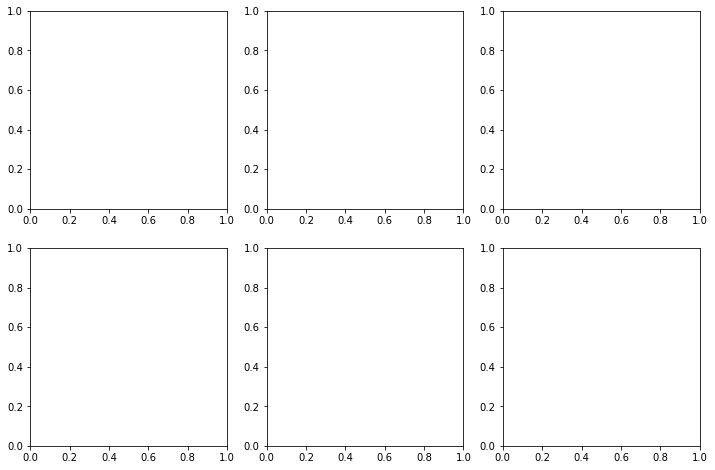

In [3]:
# plt.subplots() 提供更便捷的方法，创建一个新的 Figire
# 返回一个含有 subplot 对象的NumPy 数组
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))

axes

pyplot.subplots 选项

参数 | 说明
---|---
`nrows` | subplot row number
`ncols` | subplot column number
`sharex` | 所有 subplot 应该使用相同的X轴刻度
`sharey` | 所有 subplot 应该使用相同的Y轴刻度
`subplot_kw` | 用于创建各 subplot 的关键字自字典
`**fig_kw` | 创建 figure 时的其他关键字，如 plt.subplots(2,2,figsize=(8,6))

### Adjusting the spacing around subplots

默认，matplotlib 会在 subplot 外围留下一定的边距，并在 subplot 之间留下一定的间距。

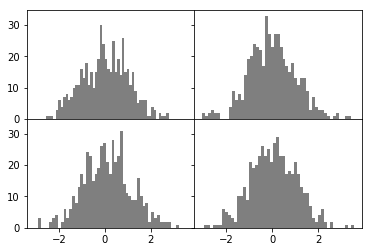

In [4]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)

# 利用 Figure.subplots_adjust 方法修改间距
# wspace, hspace 用于控制宽度、高度的百分比，用作 subplot 之间的间距
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

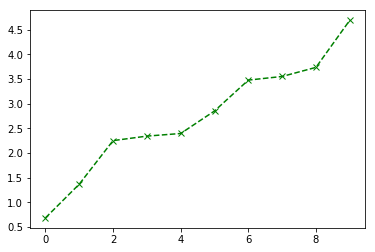

In [5]:
x = np.arange(10)
y = np.random.rand(10).cumsum()

# plot 函数接收一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写
plt.plot(x, y, 'gx--')

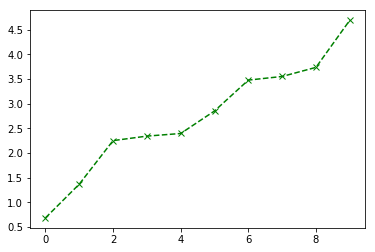

In [6]:
# 明确指定形式，展开'gx--'
# g: color
# x: marker
# --: linestyle
plt.plot(x, y, color='g', marker='x', linestyle='--')

### Ticks, Labels, and Legends

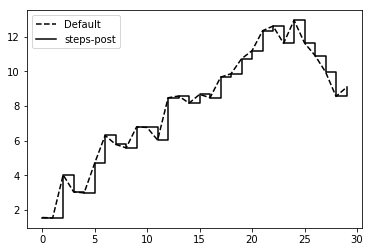

In [7]:
data = randn(30).cumsum()

# 在线型图中，非实际数据点默认是按照线型方式插值
plt.plot(data, 'k--', label='Default')

# 可以通过 drawstyle 修改
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

# 指定图例摆放位置
plt.legend(loc='best')

### Setting the title, axis labels, ticks, and ticklabels

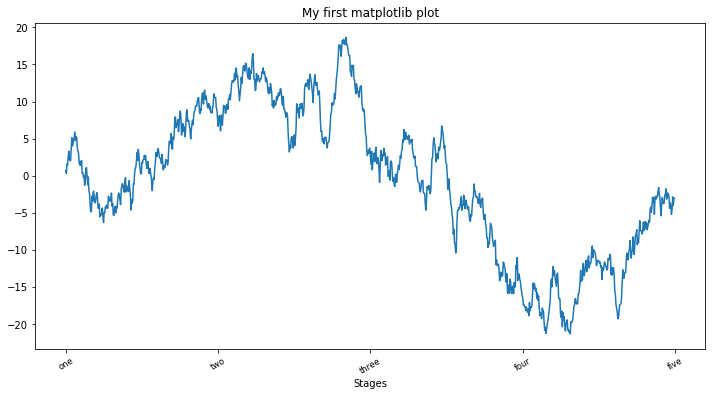

In [8]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

# 将刻度放在数据范围中的哪些位置
ax.set_xticks([0, 250, 500, 750, 1000])

# 将任何其他值用作标签
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# 为X轴设置一个名称
ax.set_xlabel('Stages')

# 设置一个标题
ax.set_title('My first matplotlib plot')


### Adding legends

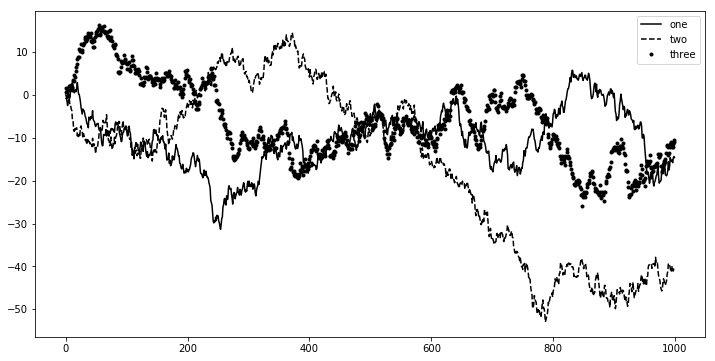

In [9]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,1,1)

# 在添加 subplot 的时候传入 label 参数
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

# loc 告诉 matplotlib 将图例放在那里
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In [10]:
# 1st column 作为 index，内容为时间
# 2nd column 作为观察对象
!head -5 ch08/spx.csv

,SPX
1990-02-01 00:00:00,328.79
1990-02-02 00:00:00,330.92
1990-02-05 00:00:00,331.85
1990-02-06 00:00:00,329.66


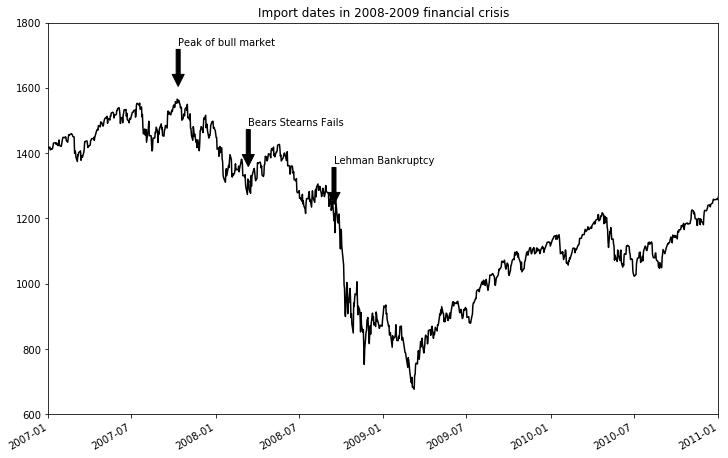

In [11]:
from datetime import datetime

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX'] # 取出 SPX column，成为一个 Series

# 画出线形图
spx.plot(ax=ax, style='k-')

# 2008-2009 金融危机期间三个重要的事件（时间、事件名称）
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bears Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# 标注注解
for date, label in crisis_data:
    ax.annotate(label,                               # 注解文字
                xy=(date, spx.asof(date) + 50),      # 箭头位置
                xytext=(date, spx.asof(date) + 200), # 文字位置
                arrowprops=dict(facecolor='black'),  # 箭头属性
                horizontalalignment='left',          # 箭头水平对齐
                verticalalignment='top')             # 箭头垂直对齐

# X轴 - 时间区间，观察 2007/1/1 ~ 2011/1/1 
ax.set_xlim(['1/1/2007', '1/1/2011'])
# Y轴 - 数值区间，观察 600 ~ 1800 
ax.set_ylim([600, 1800])

# 设置标题
ax.set_title('Import dates in 2008-2009 financial crisis')

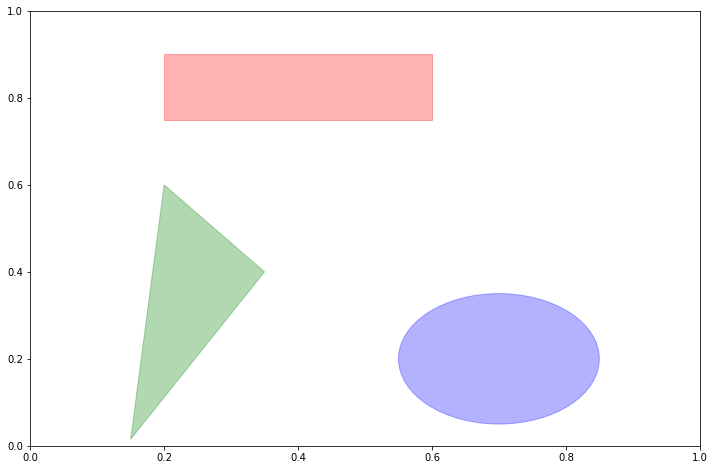

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)

# 创建 shp 对象
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='r', alpha=0.3)
circ = plt.Circle((0.7,0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15,.015], [0.35,0.4], [0.2,0.6]], color='g', alpha=0.3)

# 将shp添加到subplot中
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving Plots to File

savefig 选项

参数 | 说明
---|---
`fname` | 文件路径字串符、或python文件对象。格式由文件扩展名推断
`dpi` | 图像分辨率（每英寸点数），默认100
`facecolor`, `edgecolor` | 图像背景色，默认白色 `w`
`format` | 显式设置文件格式，png, pdf, svg, ps, eps
`bbox_inches` | 图表需要保留的部分。如果设置为 `tight`，会剪除图表空白部分

In [13]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib Configuration

matplotlib 自带一些配色方案，为生成出版质量而设定的默认配置信息。

第一种配置方式 - Python编程方式
```
plt.rc('figure', figsize=(10,10))

font_options = {'family': 'monospace',
                'weight': 'bold',
                'size':   'small'}
plt.rc('font', **font_options)
```
- 第一个参数，自定义的对象，如`figure`, `axes`, `xtick`, `ytick`
- 第二个参数，一系列的关键字参数，可写成字典

第二种配置方式 - 在 `~/.matplotlib` 目录中自定义文件

## Plotting Functions in pandas

matplotlib 是比较低阶的工具，使用各种基础组件组装图表
- 数据展示（线形图、柱状图、盒型图、散布图、等值线图）
- 图例、标题、刻度标签、注解

Pandas 有行标签、列标签、分组信息。原本制作一张完整的图标需要一堆matplotlib代码，现在只需要一两条简洁的语句即可

### Line Plots

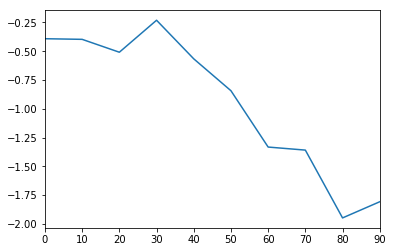

In [14]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))

# 该 Series 对象的索引回传给matplotlib，用以绘制X轴
s.plot()

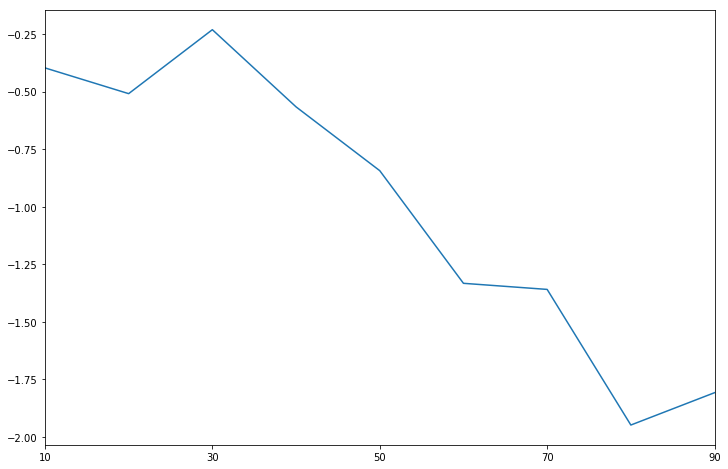

In [15]:
s.plot(figsize=(12,8), 
       xticks=[10, 30, 50, 70, 90], xlim=(10, 90))

Series.plot 方法参数

参数 | 说明
---|---
`label` | 图例标签
`ax` | 要在其上绘制的 matplotlib subplot 对象
`style` | 风格字符串，如 'ko--'
`alpha` | 填充不透明度
`kind` | 绘图种类，'line', 'bar', 'barh', 'kde'
`logy` | 在Y轴使用对数标尺
`use_index` | 将对象的索引作刻度标签
`rot` | 旋转刻度标签
`xticks` | 做X轴刻度的值
`yticks` | 做Y轴刻度的值
`xlim` | X轴的界限
`ylim` | Y轴的界限
`grid` | 显示轴网格线

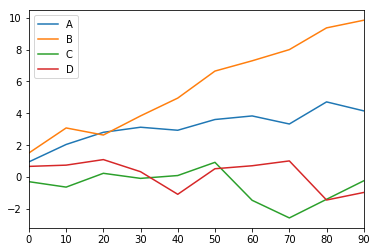

In [16]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11cf034d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d2144d0>], dtype=object)

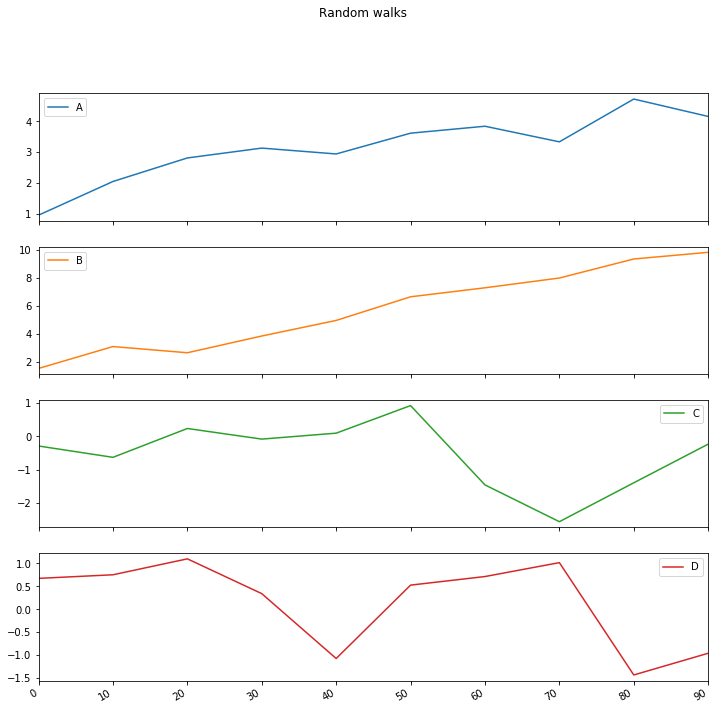

In [17]:
df.plot(subplots=True, sharex=True, figsize=(12,12), title='Random walks')

DataFrame.plot 方法参数

参数 | 说明
---|---
`subplots` | 将各个 DataFrame column 绘制到单独的 subplot 中
`sharex` | 是否共用同一个X轴，包含刻度和界限
`sharey` | 是否共用同一个Y轴
`figsize` | 图像大小
`title` | 图像标题的字符串
`legend` | 添加一个 subplot 图例
`sort_columns` | 以字母顺序绘制各列

### Bar Plots

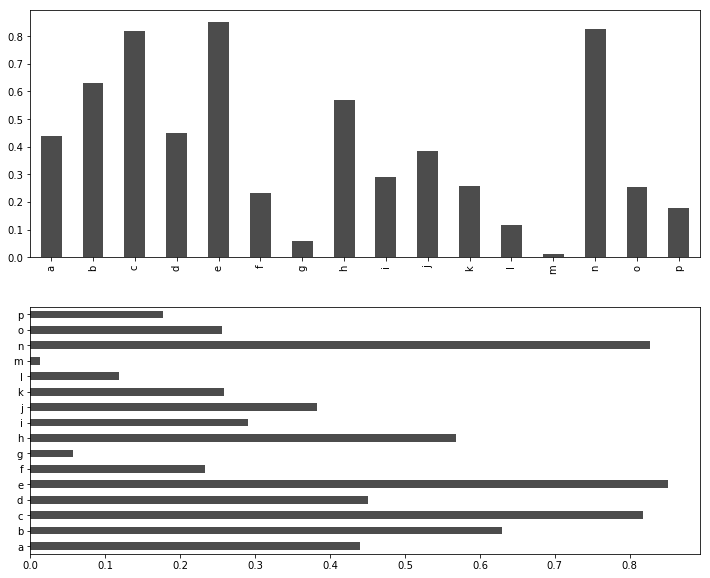

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

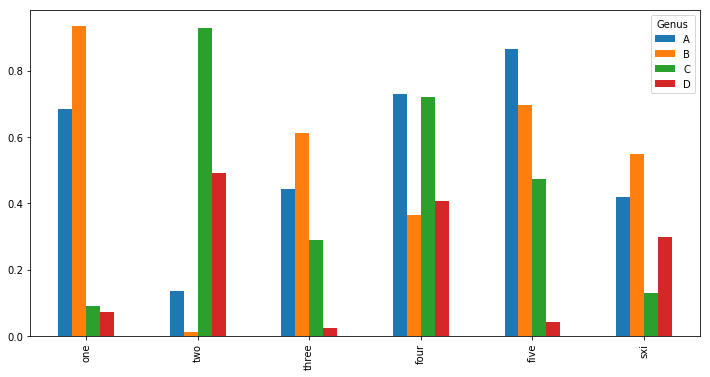

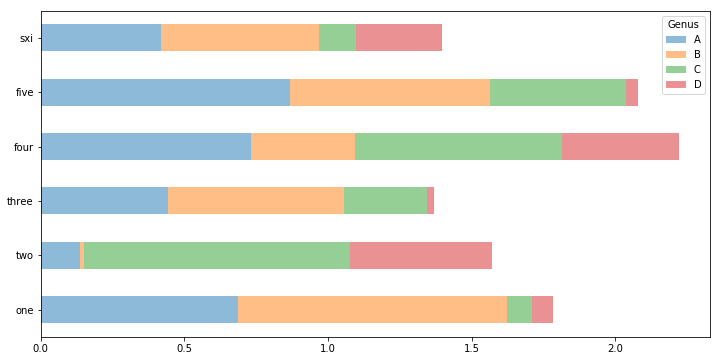

In [19]:
df = DataFrame(np.random.rand(6, 4),
              index=['one', 'two', 'three', 'four', 'five', 'sxi'],
              columns=pd.Index(['A','B','C','D'], name='Genus'))

df.plot(kind='bar', figsize=(12,6))
df.plot(kind='barh', stacked=True, alpha=0.5, figsize=(12,6))

做一张堆积柱状图，以展示每天各种聚会规模的数据百分比

In [20]:
tips = pd.read_csv('ch08/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts 

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [21]:
# 去除1个与6个人聚会的情形（较少）
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [22]:
# 计算每天总人数，沿 axis=1 加总
daily_sum = party_counts.sum(1).astype(float)
daily_sum

day
Fri     18.0
Sat     85.0
Sun     75.0
Thur    58.0
dtype: float64

In [23]:
# 进行规整化，使各行和为1
# For Series input, axis to match Series index on
party_pcts = party_counts.div(daily_sum, axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


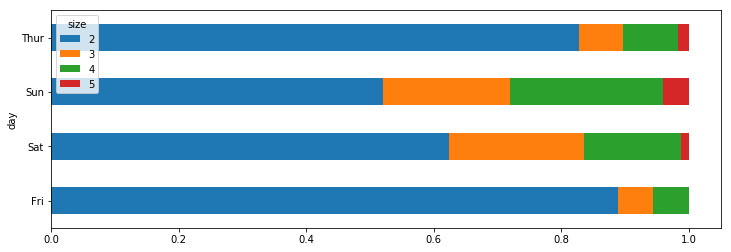

In [24]:
# 生成图表
party_pcts.plot(kind='barh', stacked=True, figsize=(12,4))

### Histograms and Density Plots

直方图（histogram）是一种可以对值频率进行离散化显示的柱状图。数据点被拆分到离散的、间隔均匀的面元中，绘制各面元数据点的数量。

密度图（density）通过计算“可能会产生的连续概率分布的估计”而产生的。一般的过程是将该分布近似为一组核（如正态分布之类的较为简单的分布）。因此，密度图也称为KDE（Kernel Density Estimate，和密度估计）图。

In [25]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

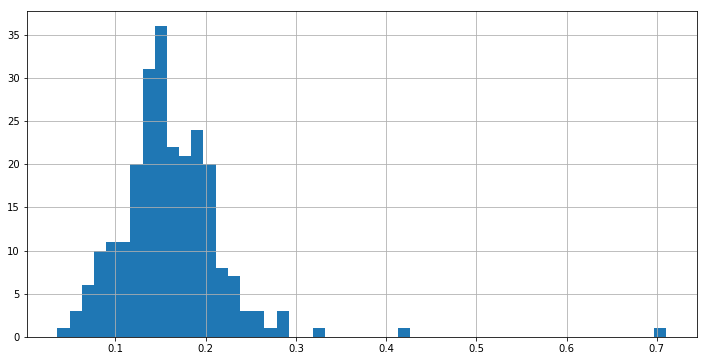

In [26]:
# 小费百分比直方图
tips['tip_pct'].hist(bins=50, figsize=(12,6))

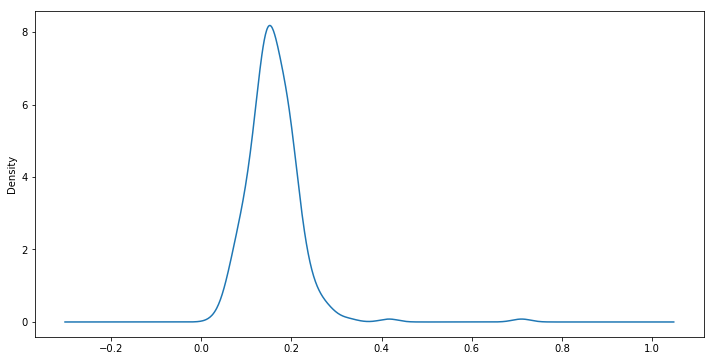

In [27]:
# 小费百分比密度图(标准混合正态分布KDE)
tips['tip_pct'].plot(kind='kde', figsize=(12,6))

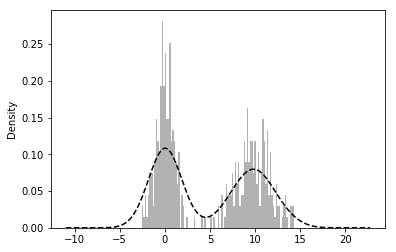

In [28]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = Series(np.concatenate([comp1, comp2]))

# 合并直方图、密度图
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter Plots

散布图（scatter plot）是观察两个一维数据序列之间的关系的有效手段。

在探索式数据分析工作中，同时观察一组变量的散布图是很有意义的，这也被称为散布图矩阵（scatter plot matrix）。纯手工创建这样的图标很费功夫，pandas 提供一个能从DataFrame创建散步矩阵图的函数。

In [29]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


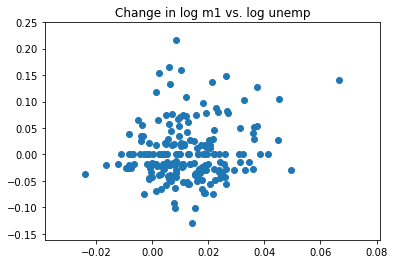

In [30]:
# 绘制一张 m1, unemp 关系的散布图
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Change in log %s vs. log %s' % ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e66bcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1212da450>]], dtype=object)

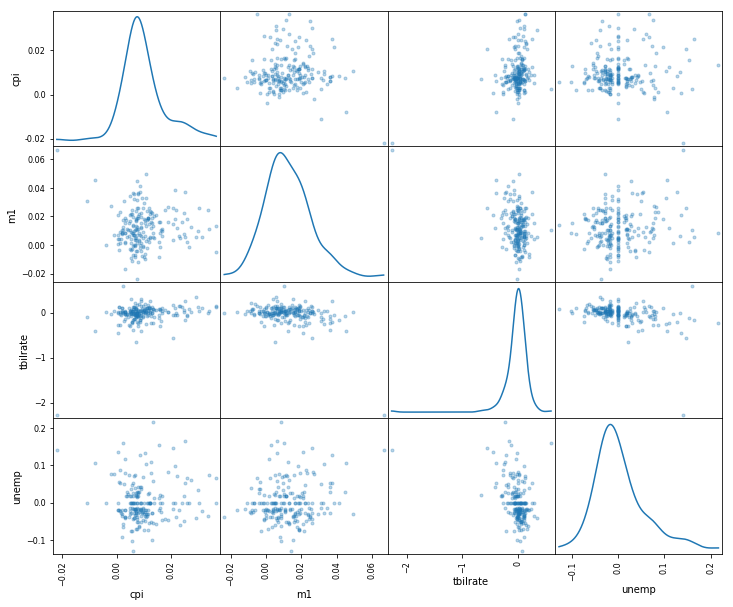

In [31]:
# 绘制一张散步矩阵图
pd.scatter_matrix(trans_data, diagonal='kde', alpha=0.3, figsize=(12,10))

### Plotting Maps: Visualizing Haiti Earthquake Crisis Data

[Matplotlib Basemap Toolkit](http://matplotlib.org/basemap/)

In [32]:
data = pd.read_csv('ch08/Haiti.csv')
data.ix[0]

Serial                                                         4052
INCIDENT TITLE    * URGENT * Type O blood donations needed in #J...
INCIDENT DATE                                      05/07/2010 17:26
LOCATION                                              Jacmel, Haiti
DESCRIPTION       Birthing Clinic in Jacmel #Haiti urgently need...
CATEGORY                1. Urgences | Emergency, 3. Public Health, 
LATITUDE                                                    18.2333
LONGITUDE                                                  -72.5333
APPROVED                                                        YES
VERIFIED                                                         NO
Name: 0, dtype: object

In [33]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']].head()

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671


In [34]:
data['CATEGORY'].head()

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
Name: CATEGORY, dtype: object

In [35]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [36]:
# Cleaning the bad locations and removing the missing categories
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70) &
            data.CATEGORY.notnull()]

In [37]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [38]:
all_cats = get_all_categories(data.CATEGORY)

# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)

english_mapping['2a'], english_mapping['6c']

('Food Shortage', 'Earthquake and aftershocks')

In [39]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), 
                       index=data.index, columns=code_index)

In [40]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))

In [41]:
from mpl_toolkits.basemap import Basemap

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, 
                projection='stere',
                lon_0=(urlon + lllon)/2,
                lat_0=(urlat + lllat)/2,
                llcrnrlat=lllat,
                urcrnrlat=urlat,
                llcrnrlon=lllon,
                urcrnrlon=urlon,
                resolution='l')
    # draw coastlines, state and country boundares, edge of map
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


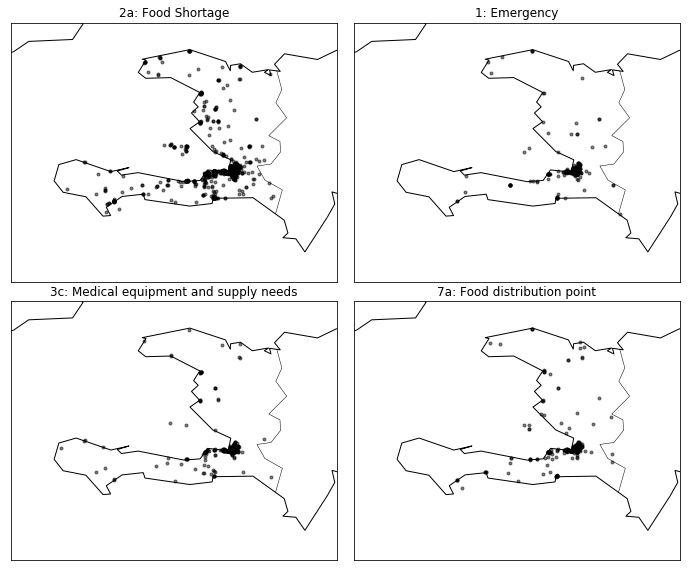

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    
    cat_data = data[data['category_%s' % code] ==1]
    
    # compute map proj coordinates
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

```
Basemap(self, 
    llcrnrlon=None,    # longitude of lower left hand corner
    llcrnrlat=None,    # latitude  of lower left hand corner
    urcrnrlon=None,    # longitude of upper right hand corner
    urcrnrlat=None,    # latitude  of upper right hand corner 
    llcrnrx=None,      # x value of lower left hand corner
    llcrnry=None,      # y value of lower left hand corner
    urcrnrx=None,      # x value of upper right hand corner
    urcrnry=None,      # y value of upper right hand corner
    width=None,        # width of desired map domain
    height=None,       # height of desired map domain
    projection='cyl',  # map projection
    resolution='c',    # resolution of boundary dataset
    area_thresh=None,  # coastline or lake area threshold
    rsphere=6370997.0, # radius of the sphere
    ellps=None,        # string describing ellipsoid
    lat_ts=None, # latitude of true scale
    lat_1=None,  # first standard parallel for lambert conformal
    lat_2=None,  # second standard parallel for lambert conformal
    lat_0=None,  # central latitude (y-axis origin)
    lon_0=None,  # central meridian (x-axis origin)
    lon_1=None,  # Longitude of one of the two points
    lon_2=None,  # Longitude of one of the two points
    o_lon_p=None,
    o_lat_p=None,
    k_0=None,    # Scale factor at natural origin
    no_rot=False,# only used by oblique mercator.
    suppress_ticks=True,
    satellite_height=35786000,
    boundinglat=None,
    fix_aspect=True,
    anchor='C',  # determines how map is placed in axes rectangle
    celestial=False,# use astronomical conventions for longitude
    round=False, # cut off pole-centered projection at boundinglat
    epsg=None,   # EPSG code defining projection
    ax=None)     # set default axes instance
```

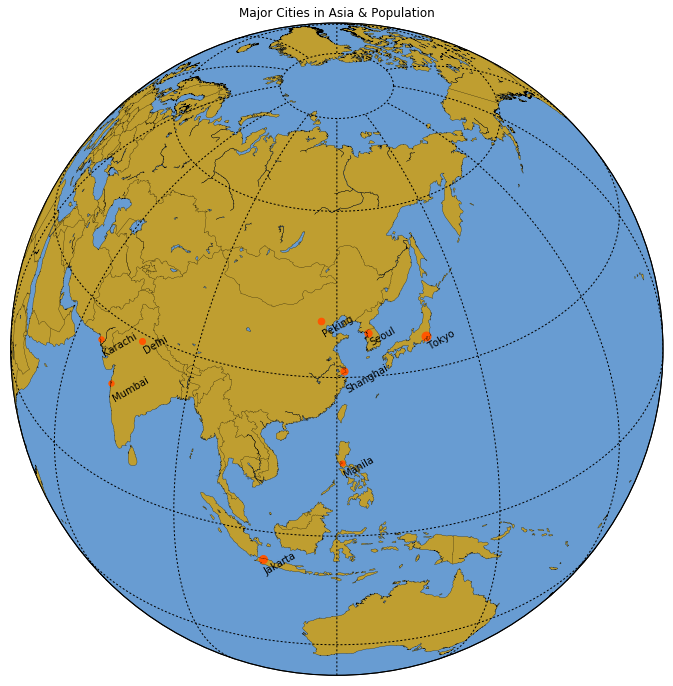

In [47]:
# 示例来源：http://www.cnblogs.com/vamei/archive/2012/09/16/2687954.html
# Written by Vamei, http://www.cnblogs.com/vamei/
# Feel free to use or modify this script.

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(1,1,1)

#============================================# read data
names = []
pops  = []
lats  = []
lons  = []
countries = []
for line in file("ch08/major_city"):
    info = line.split()
    names.append(info[0])
    pops.append(float(info[1]))
    lat  = float(info[2][:-1])
    if info[2][-1] == 'S': lat = -lat
    lats.append(lat)
    lon  = float(info[3][:-1])
    if info[3][-1] == 'W': lon = -lon + 360.0
    lons.append(lon)
    country = info[4]
    countries.append(country)

#============================================
# set up map projection with
# use low resolution coastlines.
map = Basemap(projection='ortho',lat_0=35,lon_0=120,resolution='l',ax=ax)
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.drawcountries(linewidth=0.25)
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='#689CD2')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# Fill continent wit a different color
map.fillcontinents(color='#BF9E30',lake_color='#689CD2',zorder=0)
# compute native map projection coordinates of lat/lon grid.
x, y = map(lons, lats)
max_pop = max(pops)
# Plot each city in a loop.
# Set some parameters
size_factor = 80.0
y_offset    = 15.0
rotation    = 30
for i,j,k,name in zip(x,y,pops,names):
    size = size_factor*k/max_pop
    cs = map.scatter(i,j,s=size,marker='o',color='#FF5600')
    plt.text(i,j+y_offset,name,rotation=rotation,fontsize=10)

plt.title('Major Cities in Asia & Population')
plt.show()